**APS | Parte 3: Distribuições**

Integrantes:
* Isabelle Da Silva Santos
* Livia Tanaka

In [17]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df_UE = pd.read_csv('dados_blocos\c7213e95-e23f-4682-a606-09cc46b20cbf_Data.csv')
df_OPEP = pd.read_csv('dados_blocos\ed5d4170-6c1e-41a5-83e1-a13aceb4814e_Data.csv')

filtro = ['Country Name', '2019 [YR2019]']
df_UE = df_UE[filtro]
df_OPEP = df_OPEP[filtro]


def classifica(df):
    classifica = []
    for i in range(len(df)):
        nivel = df.loc[i]['2019 [YR2019]'] 
        if nivel == '..':
            classifica.append('sem dados')
        elif float(nivel) <= 9.9:
            classifica.append('avancado')
        else:
            classifica.append('atrasado')

    df['classificacao'] = classifica
    return df

df_UE = classifica(df_UE)
df_OPEP = classifica(df_OPEP)

df_UE = df_UE[df_UE['2019 [YR2019]'] != '..'][0:25]
df_OPEP = df_OPEP[df_OPEP['2019 [YR2019]'] != '..'][0:7]




In [19]:
avancado_ue = df_UE[df_UE['classificacao'] =='avancado']
avancado_opep = df_OPEP[df_OPEP['classificacao'] =='avancado']

n_avancadoEue = len(avancado_ue)
n_avancadoEopep = len(avancado_opep)
n_avancado = n_avancadoEopep + n_avancadoEue

n_UE = len(df_UE)
n_OPEP = len(df_OPEP)
n_total = n_OPEP + n_UE

P_avancado = n_avancado / n_total


In [20]:
# P(avançado|União Europeia)

P_avancadoEue = n_avancadoEue / n_total
P_UE = n_UE / n_total

P_avancado_dado_ue = P_avancadoEue/ P_UE
print(f'Probabilidade de um país da União Europeia ser avançado: {P_avancado_dado_ue}')

# P(União Europeia|avançado) a partir do Teorema de Bayes
P_ue_dado_avancado = P_avancadoEue / P_avancado
print(f'Probabilidade de um país avançado ser da União Europeia: {P_ue_dado_avancado}')


Probabilidade de um país da União Europeia ser avançado: 0.76
Probabilidade de um país avançado ser da União Europeia: 1.0


In [21]:
# P(avançado|OPEP)
P_avancadoEopep = n_avancadoEopep / n_total
P_OPEP = n_OPEP / n_total

P_avancado_dado_opep = P_avancadoEopep/ P_OPEP
print(f'Probabilidade de um país da Organização dos Países Exportadores de Petróleo ser avançado: {P_avancado_dado_opep}')

# P(OPEP|avancado) a partir do Teorema de Bayes
P_opep_dado_avancado = P_avancadoEopep / P_avancado
print(f'Probabilidade de um país avançado ser da OPEP: {P_opep_dado_avancado}')


Probabilidade de um país da Organização dos Países Exportadores de Petróleo ser avançado: 0.0
Probabilidade de um país avançado ser da OPEP: 0.0


In [22]:
# sistema que classifica países como participantes de algum bloco à partir da informação 
# de eles serem avançados ou não em relação à taxa deinsegurança severa
def classifica_dado_avancado(classificacao):
    if classificacao == 'avancado':
        return 'UE'
    else:
        return 'OPEP'


In [23]:
# contagem de acertos do sistema
certos = {'avancado UE': 0, 'atrasado UE': 0, 'avancado OPEP': 0, 'atrasado OPEP': 0}
indices_UE = df_UE.index.values.tolist()
indices_OPEP = df_OPEP.index.values.tolist()
for i in range(n_UE):
    a = indices_UE[i]
    classifica1 = df_UE.loc[a]['classificacao']
    if i < n_OPEP:
        b = indices_OPEP[i]
        classifica2 = df_OPEP.loc[b]['classificacao']
        if classifica_dado_avancado(classifica2) == 'OPEP':
            if classifica2 == 'avancado':
                certos['avancado OPEP'] += 1
            else:
                certos['atrasado OPEP'] += 1
    if classifica_dado_avancado(classifica1) == 'UE':
        if classifica1 == 'avancado':
            certos['avancado UE'] += 1
        else:
            certos['atrasado UE'] += 1

n_certos = sum(certos.values())
acuracia = n_certos/n_total
print(f'Dos {n_total} países, {n_certos} obtiveram a classificação do bloco adequada, assim resultando em uma acurácia de {acuracia}.')


Dos 32 países, 26 obtiveram a classificação do bloco adequada, assim resultando em uma acurácia de 0.8125.


In [24]:
# Probabilidade de acertos na classificação (acurácia por classe) para cada um dos blocos econômicos

# União Europeia

P_acerto_UE = (certos['atrasado UE'] + certos['avancado UE'])/ n_UE
print(f'A probabilidade de acerto da classificação na União Europeia é de {P_acerto_UE}')


# Organização dos Países Exportadores de Petróleo
P_acerto_OPEP = (certos['atrasado OPEP'] + certos['avancado OPEP'])/n_OPEP
print(f'A probabilidade de acerto da classificação na Organização dos Países Exportadores de Petróleo é de {P_acerto_OPEP}')



A probabilidade de acerto da classificação na União Europeia é de 0.76
A probabilidade de acerto da classificação na Organização dos Países Exportadores de Petróleo é de 1.0


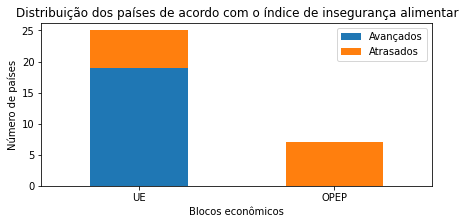

In [25]:
df = pd.DataFrame()
df['Blocos'] = ['UE', 'OPEP']
df =df.set_index('Blocos')
df['Avançados'] = [n_avancadoEue,n_avancadoEopep]
df['Atrasados'] = [n_UE - n_avancadoEue,n_OPEP -n_avancadoEopep]
df.head()


df.plot.bar(stacked=True, figsize=(7,3))
plt.ylabel('Número de países')
plt.xlabel('Blocos econômicos')
plt.title('Distribuição dos países de acordo com o índice de insegurança alimentar')
plt.xticks(rotation=0)
plt.show()

**ANÁLISE**

A partir do indicador de insegurança alimentar proposto anteriormente, visamos demonstrar se o mesmo é um bom preditor para blocos econômicos. Desse modo, uma das organizações selecionadas para a análise em questão corresponde a União Europeia (UE), a qual é considerada o principal bloco econômico do mundo que teve sua criação a partir do [“agrupamento gradual de diversos países europeus em torno de um objetivo econômico comum”](https://mundoeducacao.uol.com.br/geografia/uniao-europeia.htm). Em suma, a necessidade de reconstruir a Europa no período pós-guerra ocasionou na cooperação entre países que objetivavam fortalecer a segurança e o poderio militar, além de evitar conflitos entre nações que compartilham de aspectos semelhantes.

Logo, acontecimentos como a criação da Comunidade Europeia do Carvão e Aço, os Tratados de Roma e o nascimento do Parlamento Europeu propiciaram que, em 1991, ocorresse a fundação oficial do bloco. Atualmente, o mesmo conta com 27 Estados-membros, os quais estão inseridos em um mercado único de integração econômico-comercial onde há uma livre circulação de bens, capitais, serviços e trabalhadores. 

Sendo o segundo bloco econômico escolhido para a análise proposta, a OPEP (Organização dos Países Exportadores de Petróleo) foi criada em 1960 a partir do objetivo de constituir uma integração na política de petróleo. Ela abrange interesses relacionados à exploração, produção e exportação do petróleo. 

Primordialmente, a organização visava combater o monopólio e o lucro exacerbado do conglomerado de empresas petrolíferas conhecidas como “Sete Irmãs”. Em seu estatuto, a OPEP ["garante que os preços do petróleo oriundo de seus países-membros sejam praticados de forma conjunta e equilibrada."](https://brasilescola.uol.com.br/geografia/opep.htm#:~:text=Fun%C3%A7%C3%A3o%20da%20Opep,-Em%20seu%20estatuto&text=Dessa%20forma%2C%20%C3%A9%20uma%20organiza%C3%A7%C3%A3o,petr%C3%B3leo%2C%20sua%20produ%C3%A7%C3%A3o%20e%20distribui%C3%A7%C3%A3o.) 
Assim, as diretrizes que regem o bloco propiciam uma valorização dos royalties e um aumento de tributos, os quais geram muitos ganhos econômicos aos países membros. Ademais, por ser a fonte de energia mais importante, a economia mundial é bastante dependente do petróleo, logo, oscilações bruscas nos preços afetam toda a economia mundial, podendo influenciar no ritmo de crescimento global, fator que torna a OPEP uma organização muito poderosa. 

Analisamos o indicador de insegurança alimentar dos Estados-membros de cada bloco para classificá-los como avançados ou atrasados. Esse critério foi baseado na escala do nível de gravidade do [Índice Global da Fome (IGF)](https://www.globalhungerindex.org/pdf/pt/2021.pdf), cuja pontuação vai de 0 a 100 pontos, na qual apenas pontuações menores ou iguais a 9.9 são consideradas de baixa gravidade. Por isso, a classificação escolhida delimita que os países “avançados” possuem nível de insegurança alimentar abaixo ou igual a 9.9, e os demais países são classificados como “atrasados”.

Concluímos que a probabilidade de acerto da classificação na União Europeia é de 0.76. Já a probabilidade de acerto da classificação na Organização dos Países Exportadores de Petróleo é de 1.0. Além disso, dos 32 países, 26 obtiveram a classificação do bloco correta, assim resultando em uma acurácia de 0.8125. Infere-se, portanto, que o indicador “Prevalência De Insegurança Alimentar Grave Na População (%)” é um bom preditor para classificar os países dos blocos.

**FONTES**

BEZERRA, Juliana. Blocos Econômicos. Disponível em:
https://www.todamateria.com.br/blocos-economicos/#:~:text=O%20que%20s%C3%A3o%20blocos%20econ%C3%B4micos,redu%C3%A7%C3%A3o%20ou%20elimina%C3%A7%C3%A3o%20de%20impostos Acessado 28/10/2022.

CAMPOS, Mateus. União Europeia. Disponível em: https://mundoeducacao.uol.com.br/geografia/uniao-europeia.htm. Acessado 28/10/2022.

EXAME. União Europeia: o que é e quais países fazem parte do bloco?. 16 de agosto de 2022. Disponível em: https://exame.com/invest/guia/uniao-europeia-o-que-e-e-quais-paises-fazem-parte-do-bloco/ Acessado 28/10/2022.

MATIAS, Átila. Organização dos Países Exportadores de Petróleo (Opep). Disponível em: https://brasilescola.uol.com.br/geografia/opep.htm . Acessado em 28/10/2022.

PARLAMENTO EUROPEU. Vantagens e benefícios de fazer parte da União Europeia, 16 de fevereiro de 2018. Disponível em: https://www.europarl.europa.eu/news/pt/headlines/priorities/beneficios-da-ue Acessado 28/10/2022.

PARLAMENTO EUROPEU. História da UE. Disponível em: https://european-union.europa.eu/principles-countries-history/history-eu_pt Acessado 28/10/2022.

POLITIZE!. OPEP: o que é e qual a sua importância?, 27 de julho de 2020. Disponível em: https://www.politize.com.br/opep-o-que-e/ Acessado 28/10/2022.

UOL EDUCAÇÃO. União Européia - Bloco político e econômico reúne 27 países. Disponível em:
https://educacao.uol.com.br/disciplinas/geografia/uniao-europeia-bloco-politico-e-economico-reune-27-paises.htm Acessado 28/10/2022.

VIANA, Emily. Blocos econômicos – o que são, quais são e para que servem? 18 de setembro de 2019. Disponível em: https://conhecimentocientifico.com/blocos-economicos/ Acessado 28/10/2022.



**APS | Parte 2: Correlações**

**Tabela indicando quais foram as modificações feitas na entrega anterior para contemplar o feedback que foi recebido:**

**FEEDBACK** 

Comentarios 1: "Bom trabalho e boa análise. Uma correção pontual: a frase inicial ("Os cálculos mostram que o Afeganistão, país com um dos piores índices de insegurança alimentar, possui uma covariância de -0.25 e uma correlação de aproximadamente -0.96...") parece indicar que a correlação de -0.96 contribui para pensar que um dos indicadores fica constante, mas somente a covariância é que dá essa indicação. A correlação negativa indica que quando um aumenta o outro diminui, mas, pelo gráfico e pela covariância, vemos que essa diminuição é muito pequena."

**As palavras destacadas em <span style="color:violet">violeta</span> no texto a seguir representam quais foram as modificações feitas na entrega anterior para contemplar o feedback que foi recebido.**




**ANTES**

Os cálculos mostram que o Afeganistão, país com um dos piores índices de insegurança alimentar, possui uma covariância de -0.25 e uma correlação de aproximadamente -0.96, representando uma correlação negativa quase perfeita. Isso quer dizer que, ao contrário de nossa hipótese, conforme a insegurança alimentar aumenta a mortalidade se mantém constante, tendência observada no gráfico. Dessa forma, entendemos que a mortalidade em decorrência das doenças em questão podem estar relacionadas a outro indicador, proveniente, como a instabilidade geopolítica que o país vem enfrentando. Já o Brasil, possui uma correlação e covariância de, respectivamente, -0,55 e -0,1500, tendo o comportamento de seus gráficos bastante distinto. Por fim, a Noruega, país com um dos menores índices de insegurança alimentar, possui uma correlação de 0,79 e uma covariância de 0,02, fator que revela a existência de correlação positiva entre os indicadores analisados, entretanto, a covariância é mínima.

**DEPOIS**

Os cálculos mostram que o Afeganistão, país com um dos piores índices de insegurança alimentar, possui uma covariância de -0.25 e uma correlação de aproximadamente -0.96, representando uma correlação negativa quase perfeita. Isso quer dizer que, ao contrário de nossa hipótese, conforme a insegurança alimentar aumenta, a mortalidade se mantém constante, tendência observada no gráfico,<span style="color:violet"> apesar de ter uma correlação próxima de -1, a baixa covariância indica que tal relação é de baixa magnitude</span>. Dessa forma, entendemos que a mortalidade em decorrência das doenças em questão podem estar relacionadas a outro indicador, como a instabilidade geopolítica que o país vem enfrentando. Já o Brasil, possui uma correlação e covariância de, respectivamente, -0,55 e -0,1500, tendo o comportamento de seus gráficos bastante distinto. Por fim, a Noruega, país com um dos menores índices de insegurança alimentar, possui uma correlação de 0,79 e uma covariância de 0,02, fator que revela a existência de correlação positiva entre os indicadores analisados, entretanto, a covariância é mínima.

